# Importacion de librerias

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##  Lectura de archivo

In [2]:
gym= pd.read_csv('./datasets/gym_churn_us.csv')

## Análisis exploratorio de datos (EDA)

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
metricas_gym = gym.describe()

In [5]:
metricas_gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
val_med= gym.groupby('Churn').mean()

In [7]:
print(val_med)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

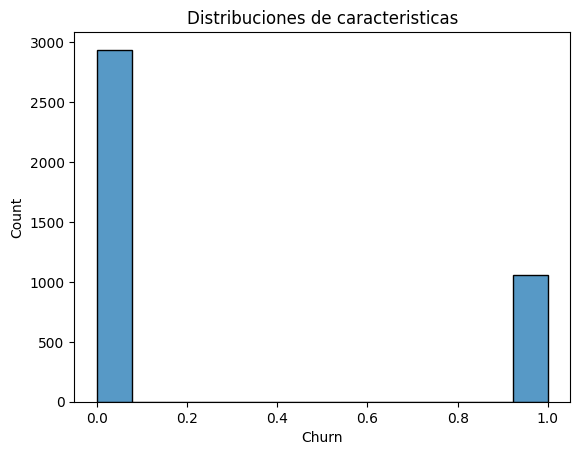

In [8]:
sns.histplot(gym['Churn']).set_title("Distribuciones de caracteristicas")
plt.show()

###### Al compara los clientes que se quedan en relacion con los que se van con sidero que los que se van estan por debajo de la mitad de los que se quedan. 

In [9]:
mat_cor= gym.corr()

In [10]:
mat_cor

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


In [11]:
print(gym.shape)

(4000, 14)


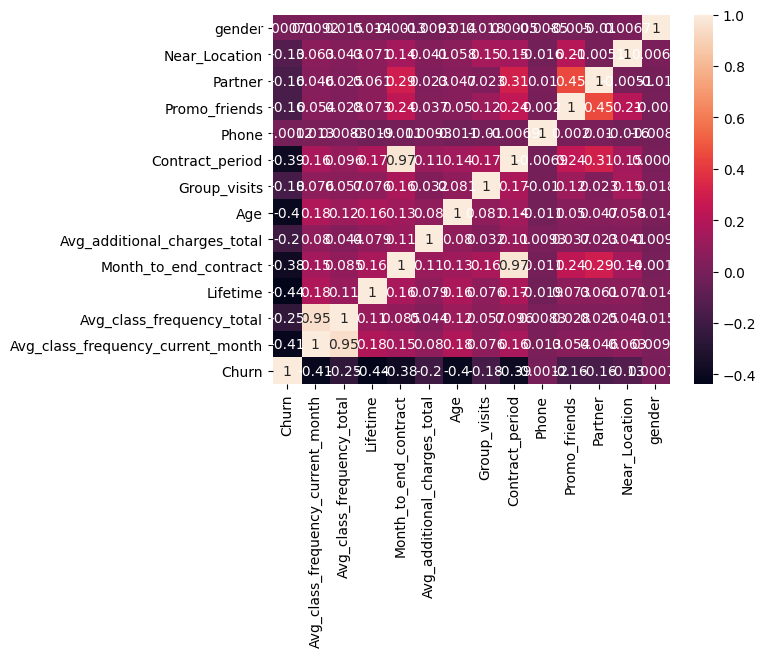

In [14]:
fig, ax = plt.subplots()
sns.heatmap(mat_cor, annot= True)
ax.set_ylim(14, 0)
ax.set_xlim(14, 0)
plt.show()

## Construir un modelo para predecir la cancelación de usuarios

In [ ]:
X = gym.drop('Churn', axis= 1)
y =gym['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

In [ ]:
model_1= LogisticRegression(random_state=0)
model_1.fit(X_train,y_train)
predictions = model_1.predict(X_test)
print('LogisticRegression:')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

In [ ]:
model_2= RandomForestClassifier(n_estimators = 100, random_state = 0)
model_2.fit(X_train, y_train)
predictions_m2 = model_2.predict(X_test)
print('RandomForestClassifier:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_m2)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_m2)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_m2)))

###### Podemos ver que al aplicar los metodos de regresion logica y bosque aleatorio nuestras metricas no tienen variaion significativa, incluso en exactitud su valor es igual

## Crear clústeres de usuarios/as

In [ ]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [ ]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym)

In [ ]:
km = KMeans(n_clusters= 5)

In [ ]:
labels =  km.fit_predict(x_sc)

In [ ]:
gym['Churn'] = labels

In [ ]:
print(gym['Churn'])

In [ ]:
show_clusters_on_plot(gym,'Avg_class_frequency_total','Avg_additional_charges_total','Churn')
show_clusters_on_plot(gym,'Avg_class_frequency_total','Avg_class_frequency_current_month','Churn')

###### Podemos darnos cuenta que en estos promedios no existe ninguna relacion (Avg_class_frequency_total' vs 'Avg_additional_charges_total') a diferncia de la comparativa entre ('Avg_class_frequency_total' vs 'Avg_class_frequency_current_month') que encontramos una relacion positva 

In [ ]:
gym.groupby('Churn').mean()

## Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

###### Al realizar los clústeres podemos ver que Promedio clase frecuencia total y el Promedio cargas adicionales total son muy peculiares a difernci de la comparativa de Promedio clase frecuencia total con Promedio clase frecuencia mes actual que nos dan una grafica mas lineal. 

###### Aplicando los metodos de regresión logística y bosque aleatorio,  encontramos variacion minima en las metricas, y en especial en la metrica de exactitud no existe cambio alguno